In [1]:
# Initialize Otter
import otter

grader = otter.Notebook("project.ipynb")

# Project 01 – The Other Side of Gradescope

## DSC 80, Fall 2021

### Checkpoint Due Date: Thursday, October 7
### Due Date: Thursday, October 14

---
# Instructions

This Jupyter Notebook contains the statements of the problems and provides code and markdown cells to display your answers to the problems.  
* Like the lab, your coding work will be developed in the accompanying `project.py` file, that will be imported into the current notebook. This code will be autograded.
* **For the checkpoint, you only need to turn in a `project.py` containing solutions for questions 1-4**
    - The checkpoint autograder on Gradescope does not thoroughly check your code -- it only runs the doctests on problems 1-4 to make sure that you have completed them. When you submit the final version of the project, we will use more tests to check these answers more thoroughly.

**Do not change the function names in the `*.py` file**
- The functions in the `*.py` file are how your assignment is graded, and they are graded by their name.
- If you changed something you weren't supposed to, just use git to revert!

**Tips for developing in the .py file**:
- Do not change the function names in the starter code; grading is done using these function names.
- Do not change the docstrings in the functions. These are there to tell you if your work is on the right track!
- You are **encouraged to write your own additional functions** to solve the questions! 
    - Developing in python usually consists of larger files, with many short functions.
    - You may write your other functions in an additional `.py` file that you import in `project.py` -- however, be sure to upload these to gradescope as well!
- Always document your code!

**Tips for testing the correctness of your answers!**
Once you have your work saved in the .py file, you should import the `project` to test your function out in the notebook. In the notebook you should inspect/analyze the output to assess its correctness!
* Run your functions on the main dataset (`grades`) and ask yourself if the output *looks correct.*
* Run your functions on very small datasets (e.g. 1-5 row table), calculate the expected response by hand, and see if the function output matches (this *is* unit-testing your code with data).
* Run your functions on (large and small) samples of the dataset `grades` (with and without replacement). Does your code break? Or does it still run as expected.

In [125]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
from project import *

## About the Assignment

The file contains the grade-book from a fictional data science course with 535 students. 

**Note: this dataset is synthetically generated; it does not contain real student grades. The course syllabus below is also similar, but not exactly the same as the course syllabus for this class!**

In this project, you will:
1. clean and process the data to compute total course grades according to a fictional syllabus (below),
2. qualitatively understand how students did in the course,
3. understand how student grades vary with small changes in performance on each assignment.

---

The course syllabus for this fictional class is as follows:

* Lab assignments 
    - Each are worth the same amount, regardless of each lab's raw point total.
    - The lowest lab is dropped.
    - Each lab may be revised for one week after submission for a 10% penalty, for two weeks after submission for a 30% penalty, and beyond that for a 60% penalty. Such revisions are reflected in the `Lateness` columns in the gradebook.
    - Labs are 20% of the total grade.
* Projects 
    - Each project consists of an autograded portion, and *possibly* a free response portion.
    - The total points for a single project consist of the sum of the raw score of the two portions.
    - Each are worth the same amount, regardless of each project's raw point total.
    - Projects are 30% of the total grade.
* Checkpoints
    - Project checkpoints are worth 2.5% of the total grade.
* Discussion
    - Discussion notebooks are worth 2.5% of the total grade.
* Exams
    - The midterm is worth 15% of the total grade.
    - The final is worth 30% of the total grade.


### A note on generalization

You may assume that your code will only need to work on a gradebook for a class with the syllabus given above. That is, you may assume that the dataframe `grades` looks like the given one in `data/grades.csv`.

However, such a class:
1. may have a different numbers of labs, projects, discussions, and project checkpoints.
2. may have a different number of students.

You may assume the course components and the naming conventions are as given in the data file.

The dataset was generated by Gradescope; you must attempt to reason about the data as given using what you know as a student who uses Gradescope.

### A note on 'putting everything together'

The goal of this project is to create and assess final grades for a fictional course; if anything, the process is broken down into functions for your convenience and guidance. Here are a few remarks and tips for approaching the projects:
1. If you are having trouble figuring out what a question is asking you to do, look at the big picture and try to understand what the current step is doing to contribute to this big picture. This may clarify what's being asked!
1. These questions intentionally build off of each other and the final result matters! In fact, you can 'get a question correct', but only receive partial credit on it because a previous answer was wrong.
    - Credit for a question will typically receive partial credit based on *how close* your answer is to correct (as well as some credit for a solution in the correct form). 
    - You should try to assess your answer to each question based on what you understand of the data. This might involve writing extensive code (that isn't turned in) just to check your work! Suggestions on checking your work are given in the assignment, but you should also think of your own ways of checking your work.
    - As you do this project, think about the data from the perspective of the student (which should be easy to do!)

In [5]:
grades_fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(grades_fp)

### Getting started: enumerating the assignments

First, you will list all the 'assignment names' and what part of the syllabus to which they belong.

**Question 1:**

Create a function `get_assignment_names` that takes in a dataframe like `grades` and returns a dictionary with the following structure:
- The keys are the general areas of the syllabus: `lab, project, midterm, final, disc, checkpoint`
- The values are lists that contain the assignment names of that type. For example the lab assignments all have names of the form `labXX` where `XX` is a zero-padded two digit number. See the doctests for more details.

In [6]:
grades_fp = os.path.join('data', 'grades.csv')

In [7]:
grades = pd.read_csv(grades_fp)

In [8]:
grades.head()

,PID,College,Level,lab01,lab01 - Max Points,lab01 - Lateness (H:M:S),lab02,lab02 - Max Points,lab02 - Lateness (H:M:S),project01,...,discussion07 - Lateness (H:M:S),discussion08,discussion08 - Max Points,discussion08 - Lateness (H:M:S),discussion09,discussion09 - Max Points,discussion09 - Lateness (H:M:S),discussion10,discussion10 - Max Points,discussion10 - Lateness (H:M:S)
0,A14721419,SI,JR,99.735279,100.0,00:00:00,84.990171,100.0,00:00:00,75.282632,...,00:00:00,8.895294,10,00:00:00,10.000000,10,780:01:28,10.000000,10,00:00:00
1,A14883274,TH,JR,98.829476,100.0,00:00:00,50.784231,100.0,00:00:00,52.929482,...,669:12:21,9.022407,10,00:00:00,9.020283,10,00:00:00,9.437368,10,00:00:00
2,A14164800,SI,SR,86.513369,100.0,00:00:00,47.802820,100.0,00:00:00,46.122801,...,00:00:00,3.030538,10,00:04:51,7.613698,10,00:00:00,9.624617,10,00:00:00
3,A14847419,TH,JR,100.000000,100.0,00:00:00,100.000000,100.0,00:00:00,79.121806,...,00:00:00,10.000000,10,00:00:00,9.249126,10,00:00:00,10.000000,10,00:00:00
4,A14162943,SI,JR,66.506974,100.0,00:00:00,33.422412,100.0,00:00:00,41.823703,...,00:00:00,4.439606,10,00:00:00,4.485291,10,00:00:00,6.282712,10,00:00:00


In [9]:
grades.columns

Index(['PID', 'College', 'Level', 'lab01', 'lab01 - Max Points',
       'lab01 - Lateness (H:M:S)', 'lab02', 'lab02 - Max Points',
       'lab02 - Lateness (H:M:S)', 'project01', 'project01 - Max Points',
       'project01 - Lateness (H:M:S)', 'lab03', 'lab03 - Max Points',
       'lab03 - Lateness (H:M:S)', 'project01_free_response',
       'project01_free_response - Max Points',
       'project01_free_response - Lateness (H:M:S)', 'lab04',
       'lab04 - Max Points', 'lab04 - Lateness (H:M:S)', 'lab05',
       'lab05 - Max Points', 'lab05 - Lateness (H:M:S)',
       'project02_checkpoint01', 'project02_checkpoint01 - Max Points',
       'project02_checkpoint01 - Lateness (H:M:S)', 'Midterm',
       'Midterm - Max Points', 'Midterm - Lateness (H:M:S)', 'lab06',
       'lab06 - Max Points', 'lab06 - Lateness (H:M:S)',
       'project02_checkpoint02', 'project02_checkpoint02 - Max Points',
       'project02_checkpoint02 - Lateness (H:M:S)', 'lab07',
       'lab07 - Max Points', 'lab07 

In [10]:
out = {'lab': [], 'project': [], 'midterm': [], 'final': [], 'disc': [], 'checkpoint': []}
list_of_column_names = list(grades.columns)
names = ['lab', 'project', 'midterm', 'final', 'disc']
for i in names:
    for j in list_of_column_names:
        if j.lower().startswith(i) & ('-' not in j) & ('_' not in j):
            content = out[i] + [j]
            out.update({i: content})
        elif ('checkpoint' in j) & ('-' not in j):
            content = out['checkpoint'] + [j]
            out.update({'checkpoint': content})
out.update({'checkpoint': list(np.unique(out['checkpoint']))})
out

{'lab': ['lab01',
  'lab02',
  'lab03',
  'lab04',
  'lab05',
  'lab06',
  'lab07',
  'lab08',
  'lab09'],
 'project': ['project01', 'project02', 'project03', 'project04', 'project05'],
 'midterm': ['Midterm'],
 'final': ['Final'],
 'disc': ['discussion01',
  'discussion02',
  'discussion03',
  'discussion04',
  'discussion05',
  'discussion06',
  'discussion07',
  'discussion08',
  'discussion09',
  'discussion10'],
 'checkpoint': ['project02_checkpoint01',
  'project02_checkpoint02',
  'project03_checkpoint01']}

In [203]:
grader.check("q1")

q1 results: All test cases passed!

### Computing project grades

**Question 2**

Compute the total score for the project portion of the course according to the syllabus. Create a function `projects_total` that takes in `grades` and computes the total project grade for the quarter according to the syllabus. The output Series should contain values between 0 and 1.

*Note*: Don't forget to properly handle students who didn't turn in assignments! (Use your experience and common sense).

*Note:* To check your work, try (1) calculating the score for a few types of students by hand, and (2) calculate the statistics for the class performance on each individual course project, making sure they look reasonable.

In [359]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
grades = pd.read_csv(grades_fp)

In [360]:
grades_fill = grades.copy().fillna(0)
project = get_assignment_names(grades_fill)['project']
cols = grades_fill.columns.values
con = []
score = dict(zip(project, [0] * len(project)))
y = pd.Series(np.zeros((len(grades_fill),)))
project_sum = {key: y for key in project}

for p in project:
    for col in cols:
        if col == p or '{}_free_response'.format(p) == col:
            con.append(col)

        if p in col and '{}_free_response - Max Points'.format(p) == col:
            score[p] = score[p] + grades_fill[col].iloc[0]

        if p in col and '{} - Max Points'.format(p) == col:
            score[p] = score[p] + grades_fill[col].iloc[0]

for p in project:
    for col in con:
        if p in col:
            project_sum[p] = project_sum[p] + grades_fill.loc[:, col]

for key in project_sum.keys():
    project_sum[key] = project_sum[key] / score[key]

pd.DataFrame(project_sum).fillna(0).sum(axis=1) / len(project)

0      0.916234
1      0.765932
2      0.681279
3      0.962581
4      0.737446
5      0.911481
6      0.809255
7      0.948423
8      0.877207
9      0.930326
10     0.931137
11     0.698521
12     0.967260
13     0.958396
14     0.801388
15     0.885339
16     0.994158
17     0.580891
18     0.959258
19     0.892370
20     0.896369
21     0.859813
22     0.876028
23     0.946077
24     0.906679
25     0.842103
26     0.874564
27     0.866885
28     0.838716
29     0.731846
30     0.874248
31     0.907532
32     0.950221
33     0.869557
34     0.958196
35     0.940486
36     0.930507
37     0.813961
38     0.787167
39     0.945184
40     0.705342
41     0.903554
42     0.896239
43     0.965125
44     0.913588
45     0.967846
46     0.717234
47     0.777298
48     0.892848
49     0.867935
50     0.763240
51     0.916774
52     0.985666
53     0.945855
54     0.804910
55     0.889440
56     0.858508
57     0.870414
58     0.861602
59     0.944561
60     0.886669
61     0.857709
62     0

In [361]:
grader.check("q2")

q2 results: All test cases passed!

### Computing lab grades

Now, you will clean and process the lab grades, which is a little more complicated. To do this, you will develop functions that:
- 'normalize' the grades, 
- adjust for late submissions, 
- drop the lowest lab grade, and 
- creates a total lab score for each student.

**Question 3**

Unfortunately, Gradescope sometimes experiences a delay in registering when an assignment is submitted during "periods of heavy usage" (i.e. near a submission deadline). You need to assess when a student's assignment was actually turned in on time, even if Gradescope did not process it in time. To do this, it is helpful to know:
* Every late submission has to be submitted by a TA (late submissions are turned off).
* TAs never submitted a late assignment "just after" the deadline. 
* The deadlines were at midnight and students had to come to staff hours to late-submit their assignment.

Create a function `last_minute_submissions` that takes in the dataframe `grades` and outputs the number of submissions on each *lab* assignment that were turned in on time by a student, yet marked 'late' by Gradescope. See the doctest for more details.

*Note:* You have to figure out what truly is a late submission by looking at the data and understanding the facts about the data generating process above. There is some ambiguity in finding which submissions are truly late; you will *make a best guess for a threshold* by looking at this dataset. This question is about 'cleaning' a messy 'data recording process'.

*Note 2:* The return value of your function should only contain counts for the *labs*; other assignment types do not need to be handled.

In [249]:
grades_fill = grades.fillna(0)
labs = get_assignment_names(grades_fill)['lab']

con = []
for column in grades_fill.columns.values:
    if column.startswith('lab') and column.endswith('Lateness (H:M:S)'):
        con.append(column)
cols = grades_fill[con]
out = [0] * len(labs)

for i in range(len(grades_fill)):
    count = 0
    for col in cols:
        time_h = int(grades_fill[col].iloc[i].split(':')[0])
        time_m = int(grades_fill[col].iloc[i].split(':')[1])
        time_s = int(grades_fill[col].iloc[i].split(':')[2])
        if time_h >= 0 and time_h <= 7 and (time_m > 0 or time_s > 0):
            out[count] = out[count] + 1
        count += 1

pd.Series(data=out, index=labs)

lab01     2
lab02     0
lab03     2
lab04    12
lab05     7
lab06     8
lab07    16
lab08    11
lab09    26
dtype: int64

In [102]:
col = pd.read_csv(fp)['lab04 - Lateness (H:M:S)']
for i in col:
    time_h = int(i.split(':')[0])
    time_m = int(i.split(':')[1])
    if time_h < 24 and time_h >= 7 and time_m > 0:
        print(i)

12:08:58
14:26:58
12:08:58
14:26:58
14:26:58
12:08:58
12:08:58
12:08:58
12:08:58


In [250]:
fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(fp)
last_minute_submissions(grades)

lab01     2
lab02     0
lab03     2
lab04    12
lab05     7
lab06     8
lab07    16
lab08    11
lab09    26
dtype: int64

In [251]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4**

Now you need to adjust the lab grades for late submissions -- however, you need to take into account your investigation in the previous question, since students shouldn't be penalized by a bug in Gradescope!

Create a function `lateness_penalty` that takes in a 'Lateness' column and returns a column of penalties (represented by the values `1.0,0.9,0.7,0.4` according to the syllabus). Only *truly* late submissions should be counted as late.

*Note*: For the purpose of this project, we will only be calculating lateness for labs. There is no penalty for lateness for projects, discussions, nor checkpoints.

In [163]:
fp = os.path.join('data', 'grades.csv')
col = pd.read_csv(fp)['lab01 - Lateness (H:M:S)']
out = lateness_penalty(col)

In [206]:
grader.check("q4")

q4 results: All test cases passed!

**Question 5**

Create a function `process_labs` that takes in a dataframe like `grades` and returns a dataframe of processed lab scores. The output should:
* share the same index as `grades`,
* have columns given by the lab assignment names (e.g. `lab01,...lab10`)
* have values representing the lab grades for each assignment, adjusted for Lateness and scaled to a score between 0 and 1.

In [254]:
fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(fp)

In [268]:
grades_fill = grades.fillna(0)
labs = get_assignment_names(grades_fill)['lab']
for i in labs:
    lateness= i+ ' - Lateness (H:M:S)'
    max_p = i + ' - Max Points'
    penalty = lateness_penalty(grades_fill[lateness])
    grades_fill[i] = (grades_fill[i]/grades_fill[max_p]) * penalty
    
out = grades_fill[labs]
out

,lab01,lab02,lab03,lab04,lab05,lab06,lab07,lab08,lab09
0,0.997353,0.849902,0.637744,1.000000,1.000000,0.994518,0.389141,0.887917,0.874913
1,0.988295,0.507842,0.714477,0.783672,1.000000,0.393887,0.914061,0.944378,0.902977
2,0.865134,0.478028,0.433667,0.738875,0.927838,0.345076,0.734070,0.718204,0.757840
3,1.000000,1.000000,0.925903,0.950614,0.891614,0.688403,0.985371,0.963307,0.777880
4,0.665070,0.334224,0.706932,0.747915,0.659720,0.731345,0.607859,0.370186,1.000000
5,0.928219,1.000000,1.000000,0.973058,0.994898,0.943940,0.942872,0.994693,0.855608
6,0.981203,0.466503,0.728200,0.767573,0.897129,0.763644,0.510821,0.670815,0.549631
7,1.000000,0.996395,0.964700,0.996600,1.000000,0.950299,0.924472,0.925664,1.000000
8,0.915348,1.000000,0.997903,0.855470,1.000000,0.397548,0.858671,0.661641,1.000000
9,1.000000,0.992954,0.831942,0.802078,0.888292,0.375682,0.930922,0.526066,0.734649


In [253]:
pd.DataFrame(late_dict)

,lab01,lab02,lab03,lab04,lab05,lab06,lab07,lab08,lab09
0,1.0,1.0,0.7,1.0,1.0,1.0,0.4,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,0.4,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,0.4,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,0.9,1.0,0.4,1.0,1.0,1.0
9,1.0,1.0,1.0,0.9,1.0,0.4,1.0,1.0,1.0


In [252]:
con = []
for i in grades_fill.columns.values:
    if i.startswith('lab') and 'Late' in i:
        con.append(i)
grades_fill[con]

,lab01 - Lateness (H:M:S),lab02 - Lateness (H:M:S),lab03 - Lateness (H:M:S),lab04 - Lateness (H:M:S),lab05 - Lateness (H:M:S),lab06 - Lateness (H:M:S),lab07 - Lateness (H:M:S),lab08 - Lateness (H:M:S),lab09 - Lateness (H:M:S)
0,00:00:00,00:00:00,252:56:22,00:00:00,00:00:00,00:00:00,382:51:44,00:00:00,00:00:00
1,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,645:24:50,00:00:00,00:00:00,00:00:00
2,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,764:40:45,00:04:51,00:00:00,00:00:00
3,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
4,00:00:00,00:00:00,00:00:00,47:42:33,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
5,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
6,00:00:00,00:00:00,00:00:00,46:35:38,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
7,00:00:00,00:00:00,00:00:00,04:09:52,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
8,00:00:00,00:00:00,00:00:00,42:06:36,00:00:00,362:42:24,00:00:00,00:00:00,00:00:00
9,00:00:00,00:00:00,00:00:00,47:53:28,00:00:00,442:00:09,00:00:00,00:00:00,00:00:00


In [321]:
grader.check("q5")

q5 results: All test cases passed!

**Question 6**

Create a function `lab_total` that takes in dataframe of processed assignments (like the output of Question 5) and computes the total lab grade for each student according to the syllabus (returning a Series). Your answers should be proportions between 0 and 1. For example, if there are only 3 labs, and a student received scores of {80%,90%,100%}, then the total score would be 0.95.

*Note*: Don't forget to properly handle students who didn't turn in assignments! (Use your experience and common sense).

In [302]:
cols = 'lab01 lab02 lab03'.split()
processed = pd.DataFrame([[0.2, 0.90, 1.0],[0.1, 0.9, 0.2], [0.8,0.9,1]], columns=cols)
processed

,lab01,lab02,lab03
0,0.2,0.9,1.0
1,0.1,0.9,0.2
2,0.8,0.9,1.0


In [304]:
grade_fill = processed.fillna(0)
min_grade = grade_fill.min(axis=1)
out = (grade_fill.sum(axis=1) - min_grade)/(len(grade_fill.columns)-1)
out

0    0.95
1    0.55
2    0.95
dtype: float64

In [322]:
grader.check("q6")

q6 results: All test cases passed!

### Putting it all together

**Question 7**

Finally, you need to create the final course grades. To do this, you will add up the total of each course component according to the weights given in the syllabus. 

* Create a function `total_points` that takes in `grades` and returns the final course grades according to the syllabus. Course grades should be proportions between zero and one.
* Create a function `final_grades` that takes in the final course grades as above and returns a Series of letter grades given by the standard cutoffs (`A >= .90`, `.90 > B >= .80`, `.80 > C >= .70`, `.70 > D >= .60`, `.60 > F`). You should not use rounding to determining the letter grades.
* Create a function `letter_proportions` which takes in the dataframe `grades` and outputs a Series that contains the proportion of the class that received each grade. (This question requires you to put everything together).
* The indices should be ordered by the proportion of the class that receives that grade, from largest to smallest.

*Note 1*: Don't repeat yourself when computing the checkpoint and discussion portions of the course.

*Note 2*: Only the lab portion of the course accounts for late assignments; you may assume all assignments in other portions are turned in without penalty.

*Note 3*: These values should add up to exactly 1.0. If you are getting something close such as 0.99999, that means there is a slight issue with your code from above. 

To check your work, verify the course grade distribution and relevant statistics! Do the work by hand for a few students.

In [370]:
fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(fp)
grades_fill = grades.copy().fillna(0)
lab_score = lab_total(process_labs(grades_fill))
proj_score = projects_total(grades_fill)


def total_score_helper(taskname, grades_fill):
    task = get_assignment_names(grades_fill)[taskname]
    for i in task:
        max_p = i + ' - Max Points'
        grades_fill[i] = grades_fill[i] / grades_fill[max_p]
    task_score = grades_fill[task].sum(axis=1) / len(task)
    return task_score


check_score = total_score_helper('checkpoint', grades_fill)
disc_score = total_score_helper('disc', grades_fill)
mid_score = total_score_helper('midterm', grades_fill)
final_score = total_score_helper('final', grades_fill)

lab_score * 0.2 + proj_score * 0.3 + check_score * 0.025 + disc_score * 0.025 + mid_score * 0.15 + final_score * 0.3

0      0.902465
1      0.816654
2      0.759665
3      0.908073
4      0.675083
5      0.914075
6      0.820217
7      0.959551
8      0.887615
9      0.903025
10     0.907341
11     0.713655
12     0.878409
13     0.956324
14     0.829093
15     0.880654
16     0.917134
17     0.678561
18     0.939307
19     0.869990
20     0.787070
21     0.873090
22     0.810587
23     0.889296
24     0.816483
25     0.734875
26     0.836722
27     0.833387
28     0.882203
29     0.787483
30     0.753269
31     0.775180
32     0.919296
33     0.872864
34     0.932467
35     0.926025
36     0.886134
37     0.860225
38     0.750093
39     0.836163
40     0.720393
41     0.855646
42     0.834905
43     0.915560
44     0.901587
45     0.920633
46     0.726143
47     0.703989
48     0.826606
49     0.928898
50     0.703823
51     0.847110
52     0.941168
53     0.859960
54     0.782019
55     0.872284
56     0.904487
57     0.782544
58     0.845281
59     0.909574
60     0.887279
61     0.854090
62     0

In [385]:
final_letter = final_grades(total_points(grades))
final_count = final_letter.value_counts()
final_p = final_count/final_count.sum()
final_p

B    0.506542
C    0.224299
A    0.207477
D    0.031776
F    0.029907
dtype: float64

1.0000010000000001

In [387]:
grader.check("q7")

q7 results: All test cases passed!

### Do Seniors get worse grades?

**Question 8**

You notice that students who are seniors on average did worse in the class (if you can't verify this, you should go back and check your work!). Is this difference significant, or just due to noise?

Perform a hypothesis test, assessing the likelihood of the above statement under the null hypothesis: 
> "Seniors earn grades that are roughly equal on average to the rest of the class."


Create a function `simulate_pval` which takes in the number of simulations `N` and `grades` and returns the the likelihood that the grade of seniors was worse than the average of the class as a whole under the null hypothesis (i.e. calculate the p-value).

*Note:* To check your work, plot the sampling distribution and the observation. Do these values look reasonable?

*Note 2*: If you sample the data, make sure you sample *with* replacement.

In [388]:
grader.check("q8")

q8 results: All test cases passed!

### What is the true distribution of grades?

The gradebook for this class only reflects one particular instance of each student's performance, subject to the effects of all the little events and hiccups that occurred throughout the quarter. Might you have done better on the midterm had your roommate kept you up all night with their coughing? Wasn't it lucky that the example you were studying just before the final happened to appear on the exam?

**Question 9**

This question will simulate these '(un)lucky, random events' by adding or subtracting random amounts to each assignment before calculating the final grades. These 'random amounts' will be drawn from a Gaussian distribution of mean 0 and a std deviation 0.02:
```
np.random.normal(0, 0.02, size=(num_rows, num_cols))
```
Intuitively, such a model says that random events may bump up or down a given grade (given as a proportion):
- which on average has no effect on the class as a whole (mean 0),
- which not uncommonly might perturb a grade by 2% (std dev 0.02).

Create a function `total_points_with_noise` that takes in a dataframe like `grades`, adds noise to the assignments as described above, and returns the final scores using *the same procedure* as questions 1-7.

*Note:* You should be able to reuse (or minorly change) the code from previous problems. Try to be DRY (don't repeat yourself)!

*Note 1:* Once adding the noise to the assignment scores, use the `np.clip` function to be sure each assignment retains a score between 0% and 100%.

*Note 2:* To check your work -- what would you expect the difference between the actual scores and noisy scores to be, on average?

In [400]:
fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(fp)
grades_fill = grades.copy().fillna(0)

In [409]:
def noise_score_helper(grades_fill):
    con = []
    out = grades_fill.copy()
    for i in ['lab', 'project', 'midterm', 'final', 'disc', 'checkpoint']:
        con.append(get_assignment_names(grades_fill)[i])
    for i in con:
        for j in i:
            noise = pd.Series(np.random.normal(0, 0.02, size=(len(grades_fill), )))
            max_p = j + ' - Max Points'
            out[j] = np.clip((grades_fill[j] + noise), 0, grades_fill[max_p])
    return out



In [417]:
diff = total_points(grades_fill) - total_points_with_noise(grades_fill)

In [415]:
import matplotlib.pyplot as plt

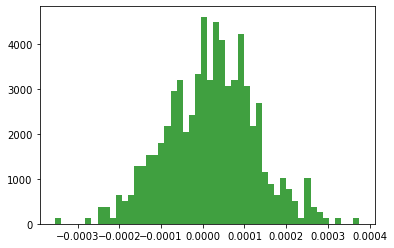

In [418]:
plt.hist(diff, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

In [433]:
count = 0
for i in diff:
    if i < 0.0001 and i > -0.0001:
        count += 1
count/len(diff)

np.percentile(diff, 97.5)

0.00024811503861455473

In [411]:
grader.check("q9")

q9 results: All test cases passed!

### Short-answer questions (hard-coded)

Use your functions from above to understanding the data and answer the following questions. The function below should return **hard-coded values**. It should not compute anything!

**Question 10**

Create a function `short_answer` with zero parameters that returns (hard-coded) answers to the following question in a list of length 5:

0. For the class on average, what is the difference between students' scores (`total_points`) and their scores with noise (`total_points_with_noise`)? (Remark: plot the distribution of differences; does this align with what you know about binomial distributions?)
1. What **percentage** of the class only sees their grade change at most (but not including) $\pm 0.01$? (Your answer should be a number between 0 and 100.)
2. What is the 95% confidence interval for the statistic above? (see [DSC10](https://www.inferentialthinking.com/chapters/13/3/Confidence_Intervals.html) and use `np.percentile`)
3. What **proportion** of the class sees a change in their letter grade? (Your answer should be a number between 0 and 1.)
4. Is the assumption behind the model in Question 9 that:
    - The (observed) gradebook well represents the true population of students? (True or False)
    - The noisy scores does not represent other possible observations drawn from the true population of students. (True or False)
    - Answer `True` or `False` in a list, like `[True, True]`.

In [435]:
grader.check("q10")

q10 results:
    q10 - 1 result:
        Test case passed!

    q10 - 2 result:
        Trying:
            out = short_answer()
        Expecting nothing
        ok
        Trying:
            (len(out[2])) == 2 and (50 < out[2][0] < 100) and (0 < out[3] < 1)
        Expecting:
            True
        **********************************************************************
        Line 2, in q10 1
        Failed example:
            (len(out[2])) == 2 and (50 < out[2][0] < 100) and (0 < out[3] < 1)
        Expected:
            True
        Got:
            False

    q10 - 3 result:
        Test case passed!

# Congratulations, you finished the project!

### Before you submit:
* Be sure you run the doctests on all your code in `project.py`

### To submit:
* **Upload the .py file to gradescope**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [436]:
grader.check_all()

q1 results: All test cases passed!

q10 results:
    q10 - 1 result:
        Test case passed!

    q10 - 2 result:
        Trying:
            out = short_answer()
        Expecting nothing
        ok
        Trying:
            (len(out[2])) == 2 and (50 < out[2][0] < 100) and (0 < out[3] < 1)
        Expecting:
            True
        **********************************************************************
        Line 2, in q10 1
        Failed example:
            (len(out[2])) == 2 and (50 < out[2][0] < 100) and (0 < out[3] < 1)
        Expected:
            True
        Got:
            False

    q10 - 3 result:
        Test case passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

q5 results: All test cases passed!

q6 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!